<a href="https://colab.research.google.com/github/ady909/Stock-Prediction-Using-LSMT/blob/main/Stock_Price_Prediction_using_LSMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [14]:
from google.colab import files
upload = files.upload()

Saving GOOG.csv to GOOG (1).csv


In [16]:

# loading dataset

data = pd.read_csv('GOOG.csv')
df = pd.DataFrame(data)
df


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [19]:
df.shape

(1258, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [20]:
df = df.drop(['symbol'],axis=1)

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [22]:
# Resample data to hourly basis
df1 = df.set_index('date').resample('m').first()
df1


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-30 00:00:00+00:00,718.27,722.4700,713.1200,716.48,1306065,718.27,722.4700,713.1200,716.48,1306065,0.0,1.0
2016-07-31 00:00:00+00:00,699.21,700.6500,692.1301,692.20,1344710,699.21,700.6500,692.1301,692.20,1344710,0.0,1.0
2016-08-31 00:00:00+00:00,772.88,780.4300,761.0900,761.09,2700470,772.88,780.4300,761.0900,761.09,2700470,0.0,1.0
2016-09-30 00:00:00+00:00,768.78,771.0200,764.3000,769.25,925131,768.78,771.0200,764.3000,769.25,925131,0.0,1.0
2016-10-31 00:00:00+00:00,772.56,776.0650,769.5000,774.25,1278821,772.56,776.0650,769.5000,774.25,1278821,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 00:00:00+00:00,1901.35,1922.3918,1850.9300,1853.57,1602182,1901.35,1922.3918,1850.9300,1853.57,1602182,0.0,1.0
2021-03-31 00:00:00+00:00,2081.51,2086.5200,2046.1000,2056.52,1405115,2081.51,2086.5200,2046.1000,2056.52,1405115,0.0,1.0
2021-04-30 00:00:00+00:00,2137.75,2142.9400,2096.8900,2097.95,1698978,2137.75,2142.9400,2096.8900,2097.95,1698978,0.0,1.0


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
high,1258.0,1.227431e+03,387.570872,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
low,1258.0,1.204176e+03,378.777094,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
open,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
volume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00
adjClose,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
adjHigh,1258.0,1.227431e+03,387.570873,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
adjLow,1258.0,1.204176e+03,378.777099,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
adjOpen,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
adjVolume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00


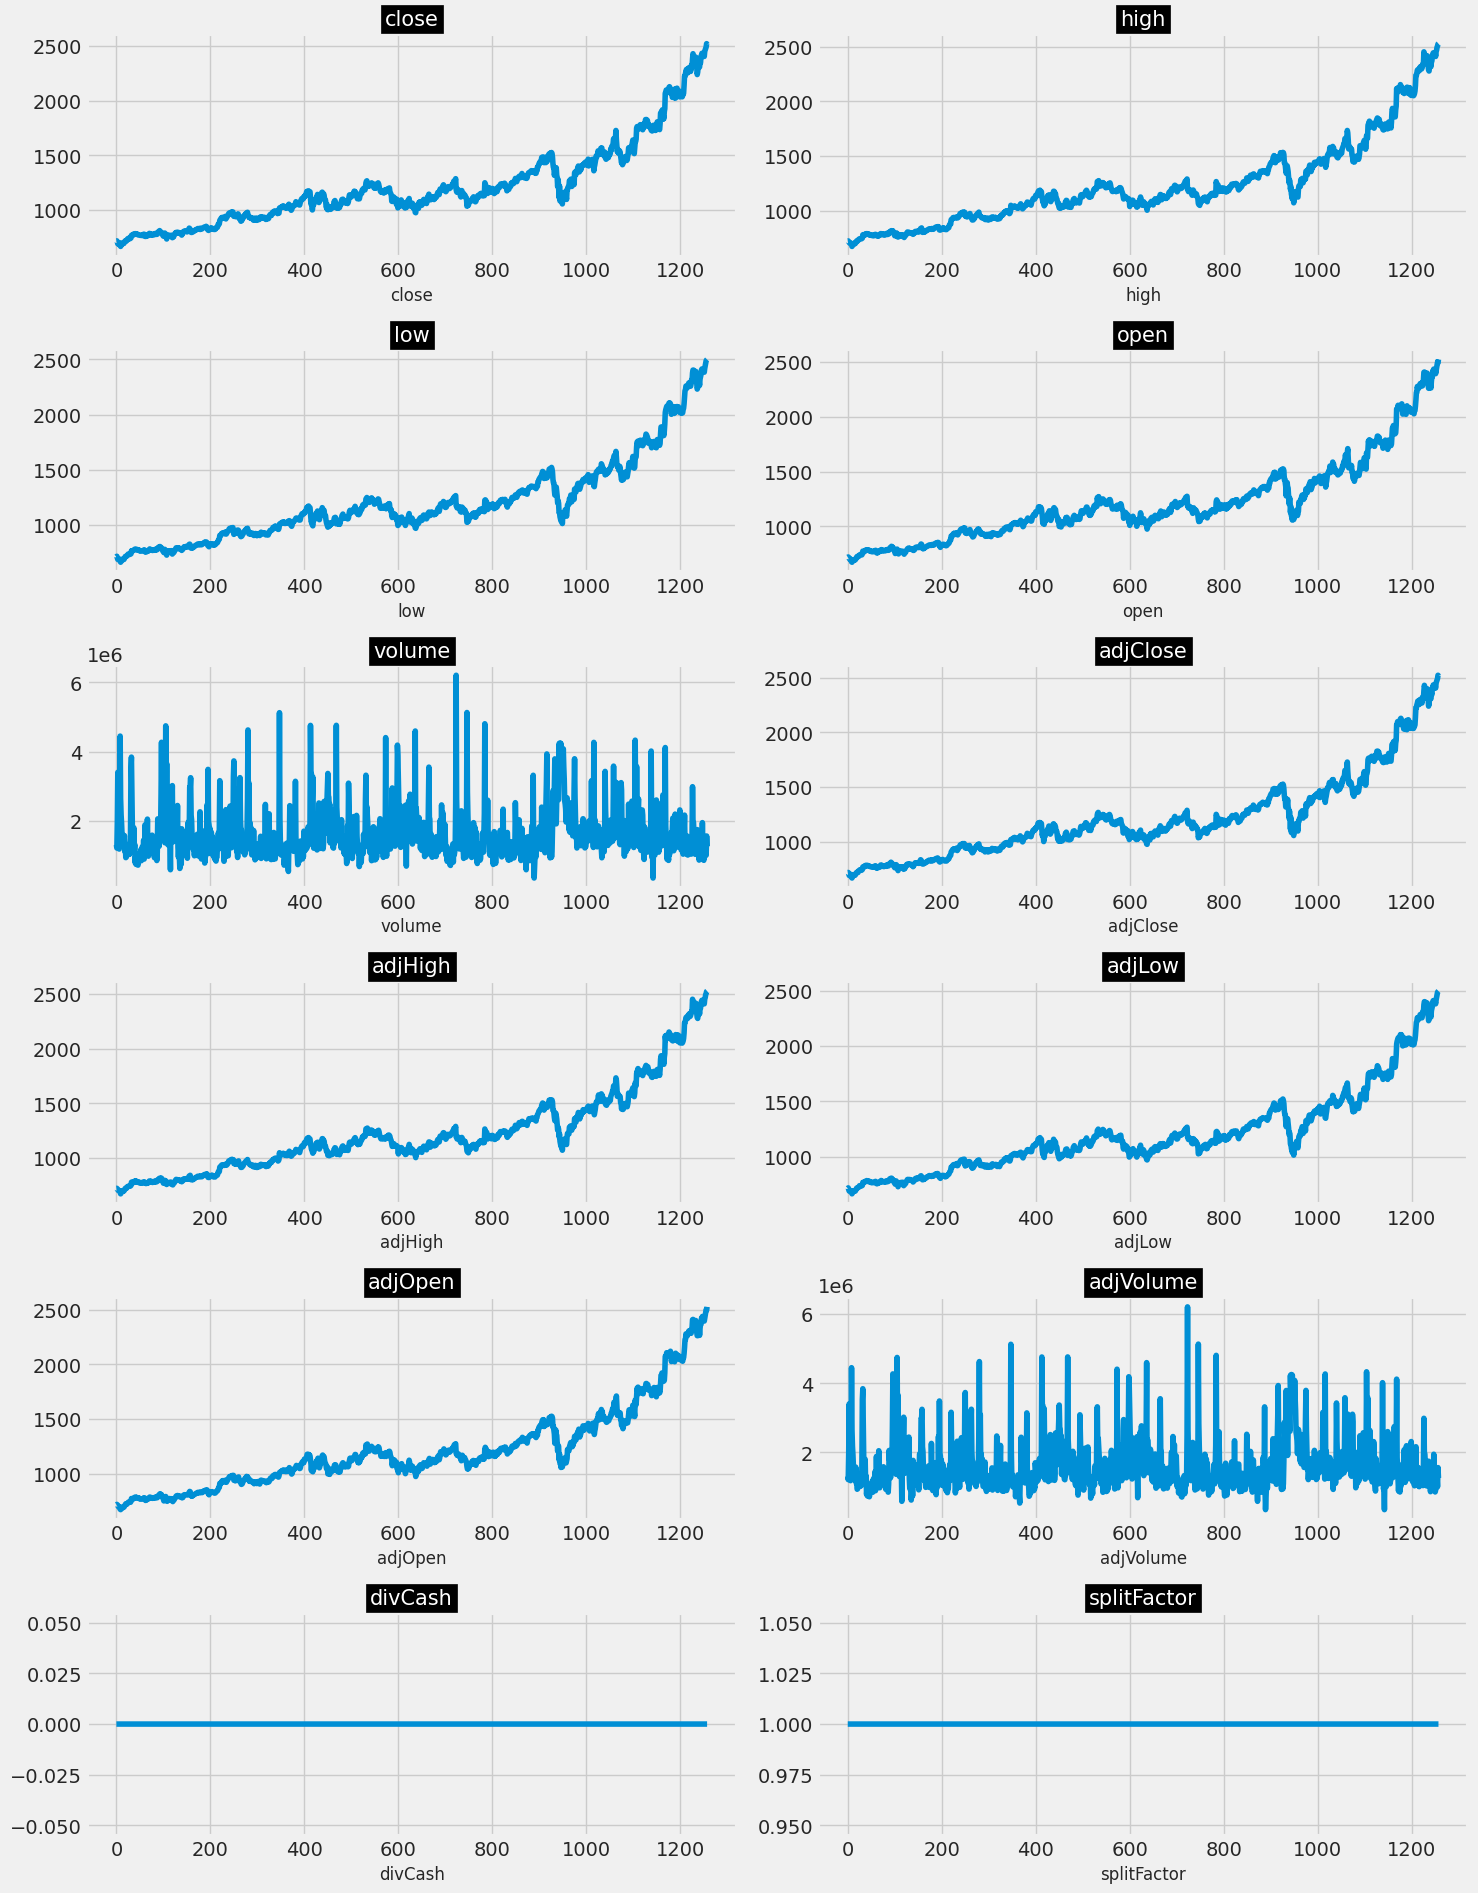

In [26]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(df1):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df.index.values,df[i])
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

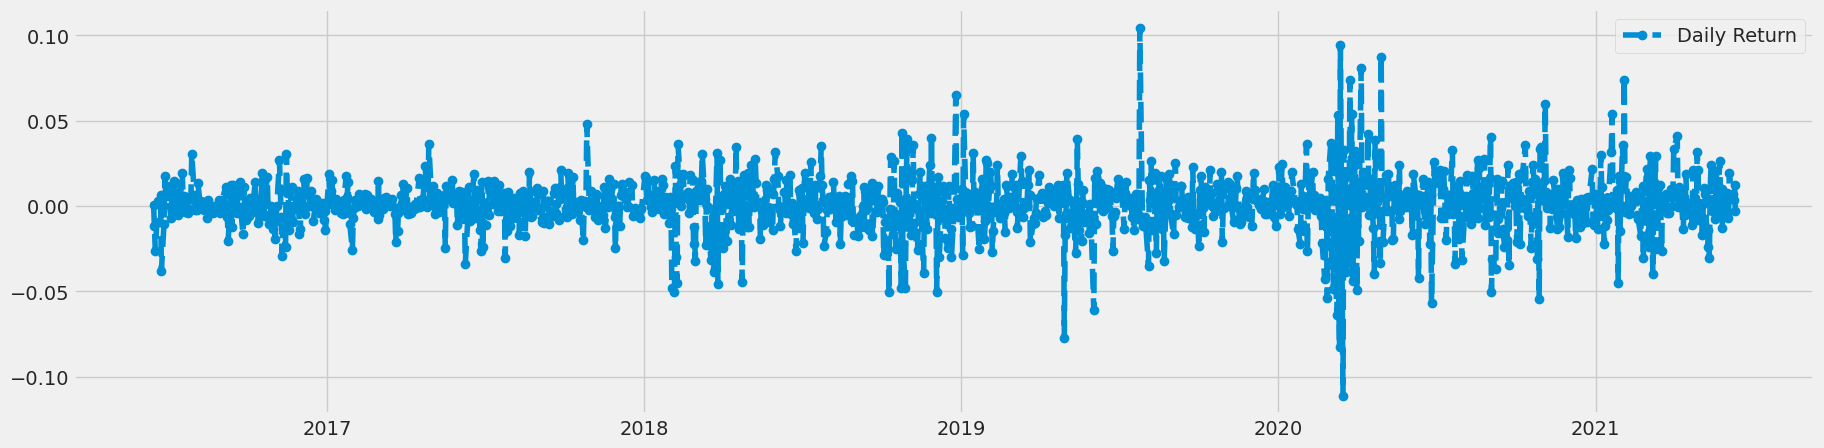

In [28]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['adjClose'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(20,5))

plt.plot(df['date'],df['Daily Return'],label='Daily Return',linestyle='--', marker='o')

plt.legend()
plt.show()

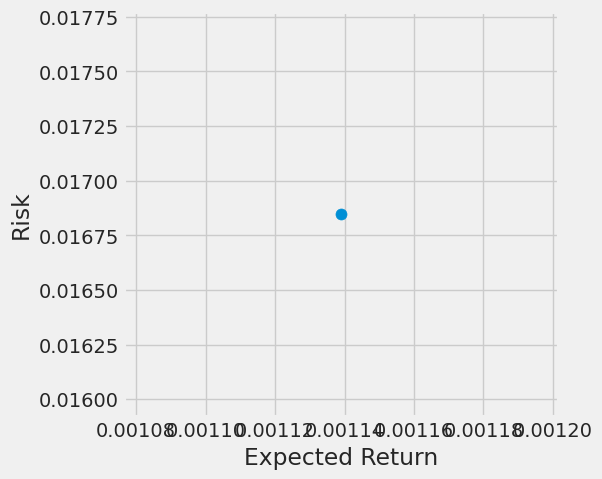

In [29]:
adjusted_close_returns = df['adjClose'].pct_change()

# Remove NaN values
returns = adjusted_close_returns.dropna()

# Set marker area
marker_area = np.pi * 20

# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(returns.mean(), returns.std(), s=marker_area)

# Label the axes
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Display the plot
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1007

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [32]:
train = scaled_data[0:int(training_data_len), :]

time_step = 30

##### Create the training data set

x_train = []
y_train = []

for i in range(time_step, len(train)):
    x_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


# Create the testing data set
test = scaled_data[training_data_len-time_step:, :]

# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len:, :]

for i in range(time_step, len(test)):
    x_test.append(test[i-time_step:i, 0])


# Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598])]
[0.03966352639019283]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,
       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,
       0.00855213, 0.01286326, 0.

In [33]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
MODEL = model.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size=64, epochs=10)

Epoch 1/10
16/16 [==============================] - 8s 213ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 3478253.2500 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 2s 112ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 3478042.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 1s 86ms/step - loss: 5.0235e-04 - accuracy: 0.0000e+00 - val_loss: 3477815.5000 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 1s 87ms/step - loss: 4.2262e-04 - accuracy: 0.0000e+00 - val_loss: 3477825.7500 - val_accuracy: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 1s 86ms/step - loss: 4.0454e-04 - accuracy: 0.0000e+00 - val_loss: 3477845.2500 - val_accuracy: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 1s 90ms/step - loss: 4.1569e-04 - accuracy: 0.0000e+00 - val_loss: 3477872.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 

In [34]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 3s 42ms/step
